<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vae_classifier_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO-DO: Update

# Atrial Fibrillation classification with VAE

In [1]:
# Install the library

!pip install rapidae

In [3]:
import keras
import matplotlib.pyplot as plt
from rapidae.data import load_AtrialFibrillation
from rapidae.models import VAE
from rapidae.models.base import RecurrentEncoder, RecurrentDecoder
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space

### Data

In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized and flatten since we are going to use a non convolutional autoencoder.
 
Train and test labels are already into one-hot encoding.

In [12]:
x_train, x_val, x_test, y_train, y_val, y_test, target_train, target_val, target_test = load_arrhythmia_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Obtain number of clasess
n_classes = y_train.shape[1]

2023-12-28 11:05:07 [INFO]: Downloading arrhythmia_data.npy...


### Model

Fix hyperparameters for the model

In [16]:
# Setup the network parameters:
timesteps = x_train.shape[1]
input_dim = x_train.shape[2]
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 10

Create the VAE model. Since in this example we are working with time series, the encoder and the decoder are recurrent LSTM layers.

Also a classifier is also added taking as input the latent space of the autoencoder. This classifier will be responsible of deciding the type of arthymia.

In [14]:
# Model creation
model = VAE(input_dim=(timesteps, input_dim), latent_dim=latent_dim, downstream_task='classification',
            encoder=RecurrentEncoder, decoder=RecurrentDecoder, layers_conf=[
                intermediate_dim], n_classes=n_classes,
            weight_vae=0.25, weight_clf=20)

2023-12-28 11:05:15.434164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 11:05:15.434209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 11:05:15.454676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 11:05:15.502194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 11:05:16.333667: W tensorflow/compiler/tf2

### Training

In [17]:
pipe = TrainingPipeline(name='training_pipeline_arrhythmia_vae', learning_rate=0.001,
                        model=model, num_epochs=epochs, batch_size=batch_size)

trained_model = pipe(x=x_train, y=y_train)

2023-12-28 11:05:53 [INFO]: +++ training_pipeline +++
2023-12-28 11:05:53 [INFO]: Creating folder in ../output_dir/training_pipeline_2023-12-28_11-05-53


Epoch 1/10

Epoch 1: loss improved from inf to 35.97223, saving model to ../output_dir/training_pipeline_2023-12-28_11-05-53/model.weights.h5
315/315 - 161s - 510ms/step - clf_loss: 1.7983 - kl_loss: 0.0266 - loss: 35.9722 - reconstruction_loss: 1.9735e-05
Epoch 2/10

Epoch 2: loss improved from 35.97223 to 35.93959, saving model to ../output_dir/training_pipeline_2023-12-28_11-05-53/model.weights.h5
315/315 - 156s - 495ms/step - clf_loss: 1.7968 - kl_loss: 0.0164 - loss: 35.9396 - reconstruction_loss: 1.7444e-06
Epoch 3/10

Epoch 3: loss improved from 35.93959 to 35.92978, saving model to ../output_dir/training_pipeline_2023-12-28_11-05-53/model.weights.h5
315/315 - 164s - 520ms/step - clf_loss: 1.7963 - kl_loss: 0.0164 - loss: 35.9298 - reconstruction_loss: 1.2753e-06
Epoch 4/10

Epoch 4: loss improved from 35.92978 to 35.90482, saving model to ../output_dir/training_pipeline_2023-12-28_11-05-53/model.weights.h5
315/315 - 167s - 529ms/step - clf_loss: 1.7951 - kl_loss: 0.0137 - loss:

### Evaluation

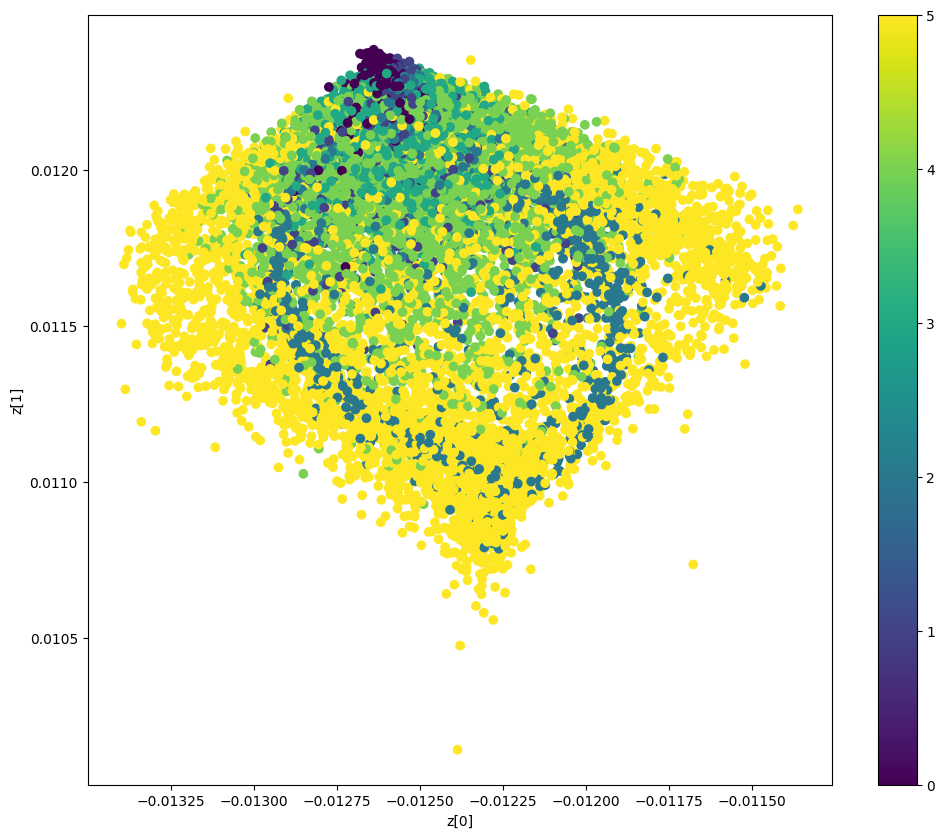

In [20]:
outputs = trained_model.predict(x_test)
plot_latent_space(outputs['z'], target_train)